# Let's make a simple autoenconder for Mnist dataset
*based on this https://blog.keras.io/building-autoencoders-in-keras.html

## Prepare the autoencoder
We'll start simple, with a single fully-connected neural layer as encoder and as decoder:



In [1]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

Using TensorFlow backend.


Let's also create a separate encoder model:



In [2]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

As well as the decoder model:



In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

Now let's train our autoencoder to reconstruct MNIST digits.

First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:

In [4]:
#compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Get the data

Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).



In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data() #ylabels are not necessary, we want to compare to themselves

We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.



In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Train the model

In [7]:
autoencoder.fit(x_train, x_train, #the x_train and y_test are the same!!
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 42us/step - loss: 0.2805 - val_loss: 0.1926
Epoch 2/50
60000/60000 [==============================] - 2s 42us/step - loss: 0.1725 - val_loss: 0.1546
Epoch 3/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.1436 - val_loss: 0.1323
Epoch 4/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1269 - val_loss: 0.1194
Epoch 5/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1162 - val_loss: 0.1106
Epoch 6/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.1087 - val_loss: 0.1044
Epoch 7/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1036 - val_loss: 0.1003
Epoch 8/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1002 - val_loss: 0.0976
Epoch 9/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.0981 - val_loss: 0.0958
Epoch

Let's create the encoded versions and their reconstructions

In [8]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Let's compare the reconstructions with the originals

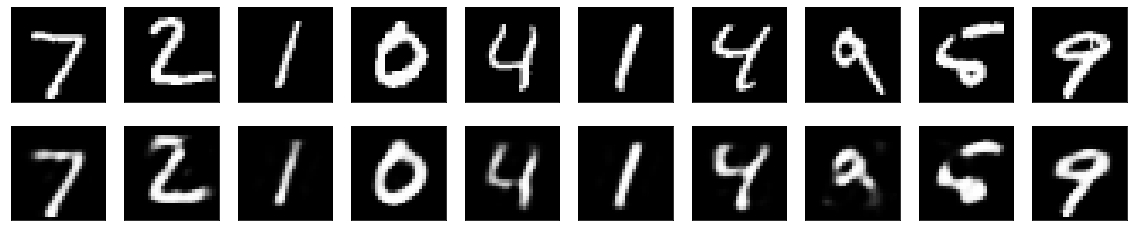

In [9]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Deep autoencoder

In [11]:
input_img = keras.Input(shape=(784,)) #this stays the same
# encoded = layers.Dense(encoding_dim, activation='relu')(input_img) (before)

encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [12]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.2407 - val_loss: 0.1630
Epoch 2/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1480 - val_loss: 0.1346
Epoch 3/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.1299 - val_loss: 0.1228
Epoch 4/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1205 - val_loss: 0.1153
Epoch 5/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1147 - val_loss: 0.1109
Epoch 6/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1107 - val_loss: 0.1077
Epoch 7/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.1075 - val_loss: 0.1049
Epoch 8/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.1048 - val_loss: 0.1025
Epoch 9/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.1027 - val_loss: 0.1

60000/60000 [==============================] - 4s 72us/step - loss: 0.0826 - val_loss: 0.0822
Epoch 78/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.0826 - val_loss: 0.0825
Epoch 79/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.0826 - val_loss: 0.0825
Epoch 80/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.0825 - val_loss: 0.0822
Epoch 81/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0824 - val_loss: 0.0823
Epoch 82/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0824 - val_loss: 0.0820
Epoch 83/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0824 - val_loss: 0.0822
Epoch 84/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.0823 - val_loss: 0.0821
Epoch 85/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.0823 - val_loss: 0.0821
Epoch 86/100
60000/60000 [========================

In [20]:
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))

# retrieve the decoder layers and apply to each prev layer
num_decoder_layers = 3
decoder_layer = encoded_input
for i in range(-num_decoder_layers, 0):
    decoder_layer = autoencoder.layers[i](decoder_layer)

# create the decoder model
decoder = keras.Model(encoded_input, decoder_layer)


In [21]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

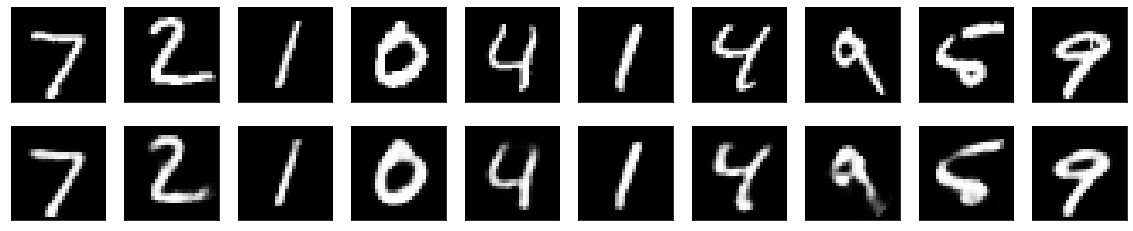

In [22]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional autoencoder
Since our inputs are images, it makes sense to use convolutional neural networks (convnets) as encoders and decoders. In practical settings, autoencoders applied to images are always convolutional autoencoders --they simply perform much better.

Let's implement one. The encoder will consist in a stack of Conv2D and MaxPooling2D layers (max pooling being used for spatial down-sampling), while the decoder will consist in a stack of Conv2D and UpSampling2D layers.

In [23]:
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [24]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

First, let's open up a terminal and start a TensorBoard server that will read logs stored at /tmp/autoencoder.

tensorboard --logdir=/tmp/autoencoder



In [27]:
! --logdir=/tmp/autoencoder

"--logdir" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [28]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 106s 2ms/step - loss: 0.2240 - val_loss: 0.1424
Epoch 2/50
60000/60000 [==============================] - 91s 2ms/step - loss: 0.1323 - val_loss: 0.1235
Epoch 3/50
60000/60000 [==============================] - 88s 1ms/step - loss: 0.1205 - val_loss: 0.1160
Epoch 4/50
60000/60000 [==============================] - 89s 1ms/step - loss: 0.1149 - val_loss: 0.1118
Epoch 5/50
60000/60000 [==============================] - 88s 1ms/step - loss: 0.1115 - val_loss: 0.1091
Epoch 6/50
60000/60000 [==============================] - 89s 1ms/step - loss: 0.1092 - val_loss: 0.1071
Epoch 7/50
60000/60000 [==============================] - 88s 1ms/step - loss: 0.1073 - val_loss: 0.1054
Epoch 8/50
60000/60000 [==============================] - 91s 2ms/step - loss: 0.1059 - val_loss: 0.1045
Epoch 9/50
60000/60000 [==============================] - 86s 1ms/step - loss: 0.1047 - val_loss: 0.1030
Epoc

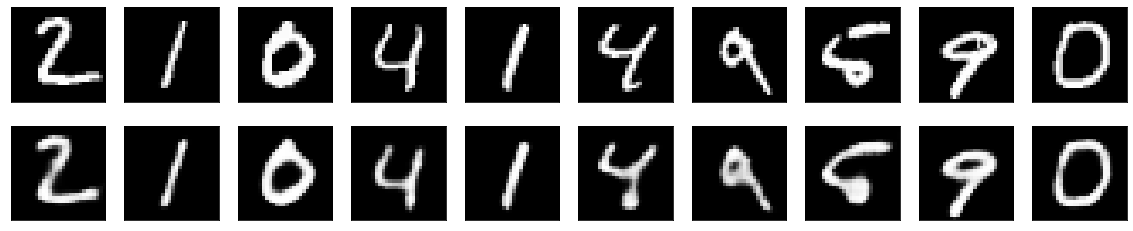

In [29]:
#Let's take a look at the reconstructed digits:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

We can also have a look at the 128-dimensional encoded representations. These representations are 8x4x4, so we reshape them to 4x32 in order to be able to display them as grayscale images.

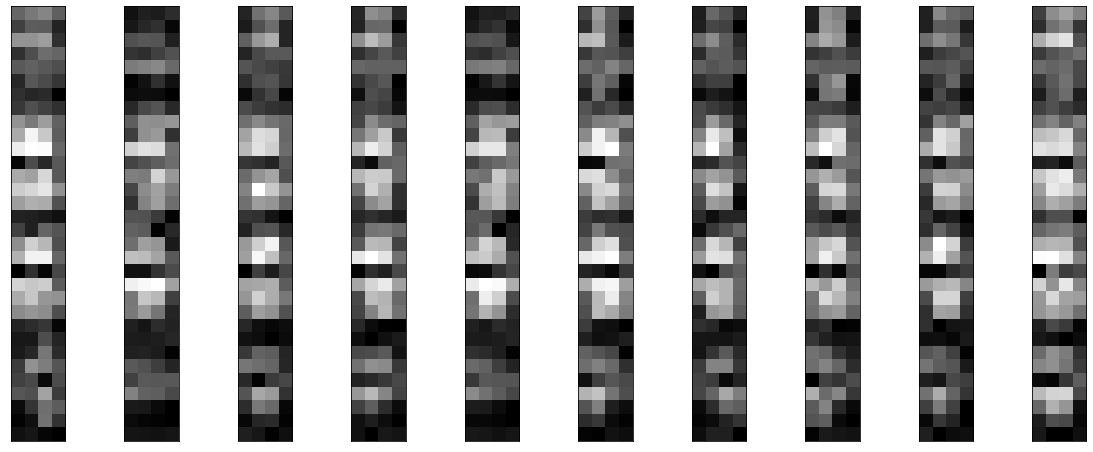

In [30]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Application to image denoising
Let's put our convolutional autoencoder to work on an image denoising problem. It's simple: we will train the autoencoder to map noisy digits images to clean digits images.

Here's how we will generate synthetic noisy digits: we just apply a gaussian noise matrix and clip the images between 0 and 1.

In [31]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Here's what the noisy digits look like:



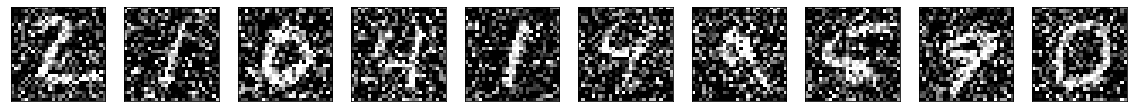

In [32]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [34]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Compared to the previous convolutional autoencoder, in order to improve the quality of the reconstructed, we'll use a slightly different model with more filters per layer:

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))
                #callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
50560/60000 [========================>.....] - ETA: 25s - loss: 0.1645